In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
%matplotlib inline

In [3]:
df_train = pd.read_csv("../data/train_users_2.csv")

### 컬럼 이해하기
- date_account_created : 처음 계정 생성한 날짜
- timestamp_first_avtive : 처음 활동한 날짜
- date_first_booking : 첫 예약 날짜
- gender : 성별
- age : 나이
- signup_method : 회원 가입 방법
- signup_flow : 회원 가입할 때 사용자 본 page 번호
- affiliate_channel : 유입 경로
- affiliate_provider : 유입 장소
- first_affiliate_tracked : 회원 가입 전 user가 반응한 첫번째 marketing
- signup_app : 모바일 앱 
- first_device_type : 첫 장치
- first_browser : 브라우저 종류
- country_destination : 첫 예약 국가

### 0. target data

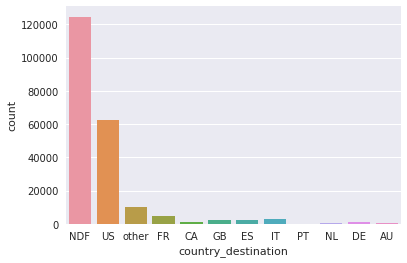

In [5]:
sns.countplot(df_train["country_destination"])

### 1. 전체 데이터 보기

총 213450개의 데이터

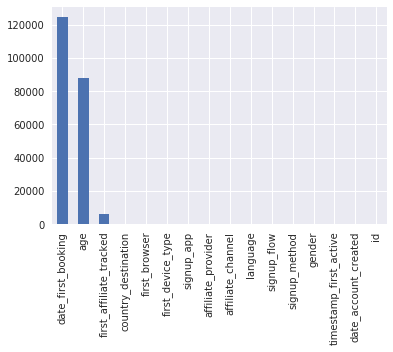

In [6]:
df_train.isnull().sum().sort_values(ascending = False).plot(kind="bar")

In [7]:
df_train.isnull().sum().sort_values(ascending = False) / len(df_train) *100

date_first_booking         58.347349
age                        41.222576
first_affiliate_tracked     2.841402
country_destination         0.000000
first_browser               0.000000
first_device_type           0.000000
signup_app                  0.000000
affiliate_provider          0.000000
affiliate_channel           0.000000
language                    0.000000
signup_flow                 0.000000
signup_method               0.000000
gender                      0.000000
timestamp_first_active      0.000000
date_account_created        0.000000
id                          0.000000
dtype: float64

- date_First_boking : 전체에서 58.3%이 결측값
- age : 전체에서 41.2%
- first_affiliate_tracked : 2.8% 유실

### 2. id

In [8]:
print("총 갯수 : {}, id 갯수 : {}".format(len(df_train["id"].unique()), len(df_train)))

총 갯수 : 213451, id 갯수 : 213451


- 중복되는 값이 없다.

### 3. date_account_created

In [9]:
df_train["date_account_created"].min(), df_train["date_account_created"].max()

('2010-01-01', '2014-06-30')

In [72]:
df_train["date_account_created"] = pd.to_datetime(df_train["date_account_created"], format = "%Y-%m-%d")

### 4. timestamp_first_active

In [78]:
df_train["timestamp_first_active"] = pd.to_datetime(df_train["timestamp_first_active"], format="%Y%m%d%H%M%S", errors='ignore')

### 5. Gender

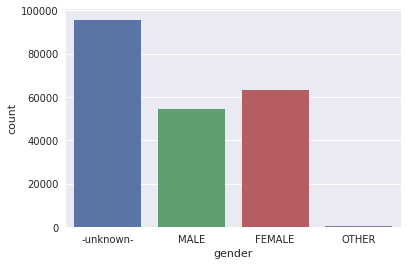

In [21]:
sns.countplot(df_train["gender"])

In [22]:
np.mean([1, 2])

1.5

In [23]:
df_train["count"] = 1

In [24]:
df_gender_country = df_train.pivot_table(values = "count", index = ["country_destination"], columns = ["gender"], aggfunc=np.sum)

In [25]:
df_gender_country["-unknown-"] = df_gender_country["-unknown-"] / df_gender_country["-unknown-"].sum() * 100
df_gender_country["FEMALE"] = df_gender_country["FEMALE"] / df_gender_country["FEMALE"].sum() * 100
df_gender_country["MALE"] = df_gender_country["MALE"] / df_gender_country["MALE"].sum() * 100
df_gender_country["OTHER"] = df_gender_country["OTHER"] / df_gender_country["OTHER"].sum() * 100

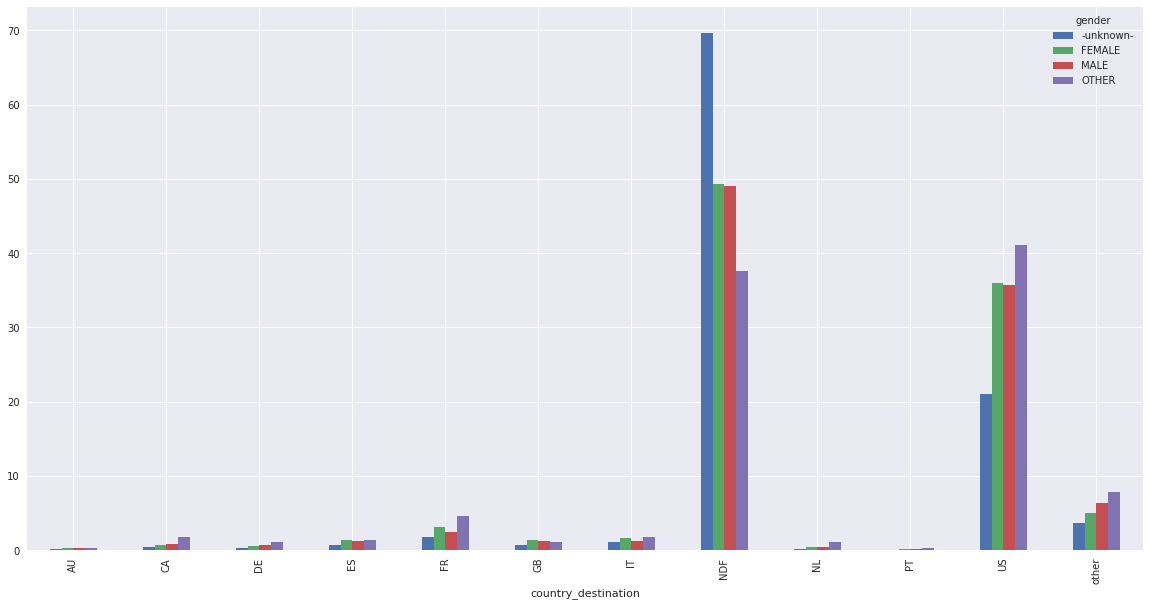

In [26]:
fig, ax = plt.subplots(figsize = (20, 10))
df_gender_country.plot(kind = "bar", ax = ax)

#### 남녀간에 차이를 나타낸 것 (female - male)

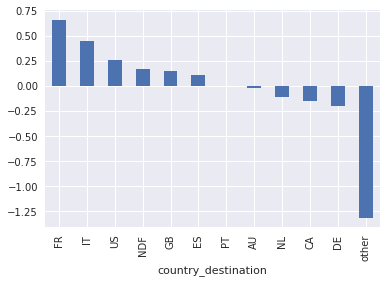

In [27]:
(df_gender_country["FEMALE"] - df_gender_country["MALE"]).sort_values(ascending = False).plot(kind="bar")

- 남자보다 여자 airbnb를 더 많이 사용한다.
- 남자가 더 많이 가는 나라 : other, DE, CA, NL
- 여자가 더 많이 가는 나라 : FR, IT, US, NDF, GB, ES 
- 별차이가 없는 것 : PT, AU

### 6. Signup_method

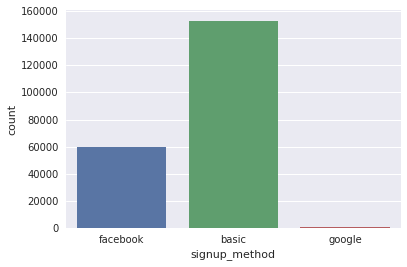

In [28]:
sns.countplot(df_train["signup_method"])

In [29]:
df_sign_country = df_train.pivot_table(values = "count", index = ["country_destination"], columns = ["signup_method"], aggfunc=np.sum)

In [30]:
df_sign_country

signup_method,basic,facebook,google
country_destination,,,
AU,393.0,146.0,NaN
CA,1105.0,322.0,1.0
DE,737.0,323.0,1.0
ES,1601.0,646.0,2.0
FR,3767.0,1253.0,3.0
GB,1727.0,597.0,NaN
IT,2147.0,686.0,2.0
NDF,87846.0,36252.0,445.0
NL,560.0,202.0,NaN


In [31]:
df_sign_country["basic"] = df_sign_country["basic"] / df_sign_country["basic"].sum() * 100
df_sign_country["google"] = df_sign_country["google"] / df_sign_country["google"].sum() * 100
df_sign_country["facebook"] = df_sign_country["facebook"] / df_sign_country["facebook"].sum() * 100

In [32]:
df_sign_country

signup_method,basic,facebook,google
country_destination,,,
AU,0.257036,0.243301,NaN
CA,0.722709,0.536595,0.183150
DE,0.482024,0.538262,0.183150
ES,1.047110,1.076523,0.366300
FR,2.463750,2.088055,0.549451
GB,1.129519,0.994867,NaN
IT,1.404213,1.143181,0.366300
NDF,57.454365,60.411945,81.501832
NL,0.366260,0.336622,NaN


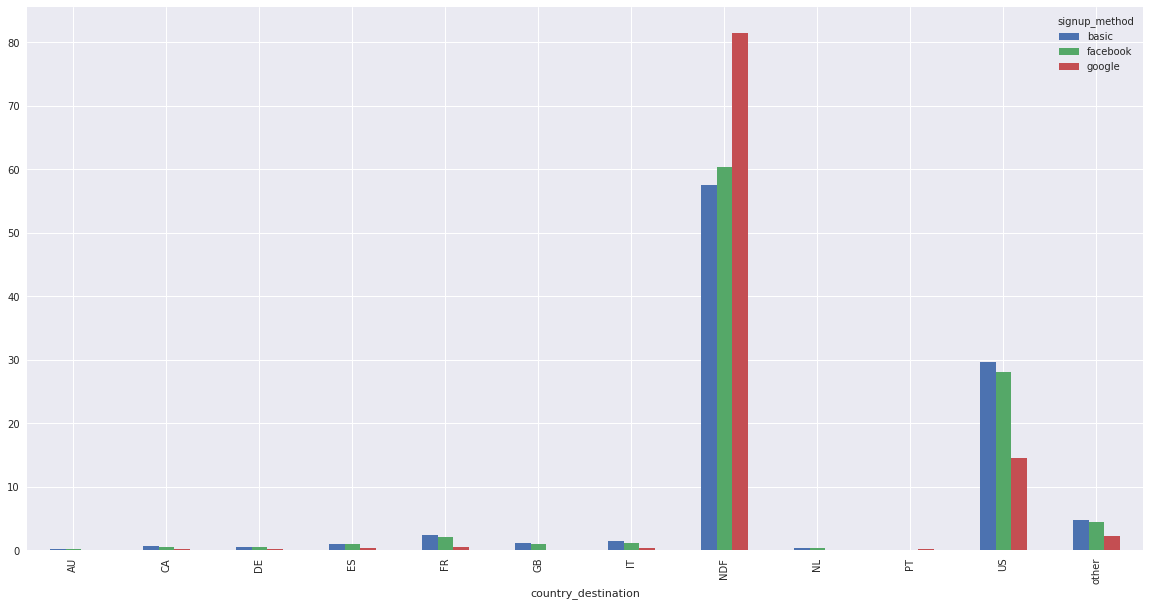

In [33]:
fig, ax = plt.subplots(figsize = (20, 10))
df_sign_country.plot(kind = "bar", ax = ax)

In [34]:
print(df_sign_country["basic"].sort_values(ascending = False).index)

Index(['NDF', 'US', 'other', 'FR', 'IT', 'GB', 'ES', 'CA', 'DE', 'NL', 'AU',
       'PT'],
      dtype='object', name='country_destination')


In [35]:
print(df_sign_country["facebook"].sort_values(ascending = False).index)

Index(['NDF', 'US', 'other', 'FR', 'IT', 'ES', 'GB', 'DE', 'CA', 'NL', 'AU',
       'PT'],
      dtype='object', name='country_destination')


In [36]:
print(df_sign_country["google"].sort_values(ascending = False).index)

Index(['NDF', 'US', 'other', 'FR', 'IT', 'ES', 'PT', 'DE', 'CA', 'AU', 'GB',
       'NL'],
      dtype='object', name='country_destination')


#### 방식 차이를 나타낸 것 (basic - facebook)

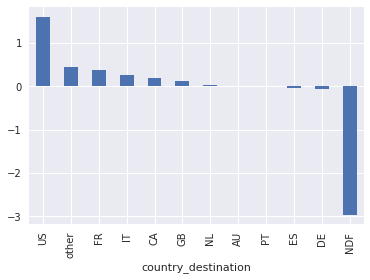

In [40]:
(df_sign_country["basic"] - df_sign_country["facebook"]).sort_values(ascending = False).plot(kind="bar")

- basic : US, other, FR, IT, CA, GB
- 상관없음 : NL, AU, PT, ES, DE
- facebook : NDF

### 7. signup_app

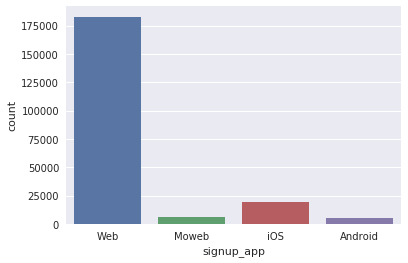

In [41]:
sns.countplot(df_train["signup_app"])

In [52]:
df_signApp_country = df_train.pivot_table(values = "count", index = ["country_destination"], columns = ["signup_app"], aggfunc=np.sum)

In [53]:
for col in list(df_signApp_country.columns):
    df_signApp_country[col] = df_signApp_country[col] / df_signApp_country[col].sum() * 100

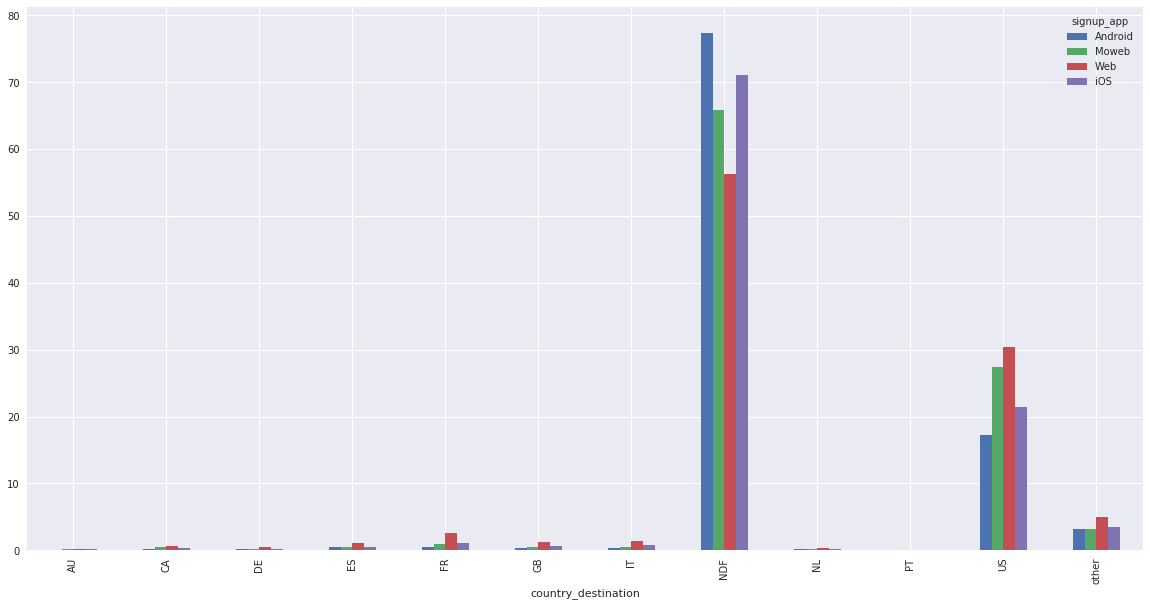

In [55]:
fig, ax = plt.subplots(figsize = (20, 10))
df_signApp_country.plot(kind = "bar", ax= ax)

In [56]:
df_signApp_country

signup_app,Android,Moweb,Web,iOS
country_destination,,,,
AU,0.055006,0.223606,0.268174,0.168253
CA,0.275028,0.463185,0.725165,0.310216
DE,0.165017,0.239578,0.545105,0.215574
ES,0.458379,0.543044,1.141109,0.552079
FR,0.476714,0.894426,2.582683,1.167254
GB,0.293363,0.527072,1.181609,0.609916
IT,0.385039,0.495129,1.444310,0.757138
NDF,77.392739,65.772241,56.204951,71.023713
NL,0.146681,0.223606,0.383653,0.205058


#### Web과 Android의 차이 방식 (Web - Android)

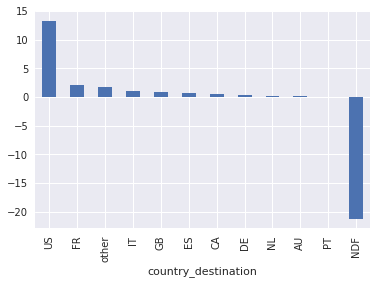

In [57]:
(df_signApp_country["Web"] - df_signApp_country["Android"]).sort_values(ascending = False).plot(kind="bar")

#### Web과 Android의 차이 방식 (Web - ios)

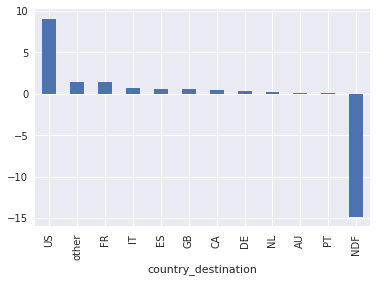

In [59]:
(df_signApp_country["Web"] - df_signApp_country["iOS"]).sort_values(ascending = False).plot(kind="bar")

- Web으로 가입하는 경우에는 US가 여행지인 경우가 많다
- Anroid 또는 iOS인 경우에는 NDF인 경우가 많다.

### 8. affiliate_channel

- 유입 경로

In [65]:
list(df_train["affiliate_channel"].unique())

['direct',
 'seo',
 'other',
 'sem-non-brand',
 'content',
 'sem-brand',
 'remarketing',
 'api']

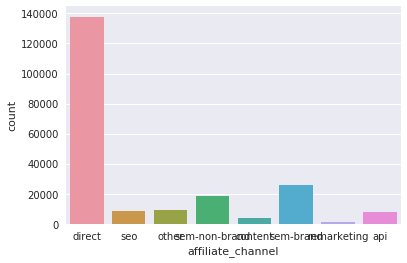

In [62]:
sns.countplot(df_train["affiliate_channel"])

### 9. affiliate_provider

- 유입되는 probider

In [67]:
list(df_train["affiliate_provider"].unique())

['direct',
 'google',
 'other',
 'craigslist',
 'facebook',
 'vast',
 'bing',
 'meetup',
 'facebook-open-graph',
 'email-marketing',
 'yahoo',
 'padmapper',
 'gsp',
 'wayn',
 'naver',
 'baidu',
 'yandex',
 'daum']

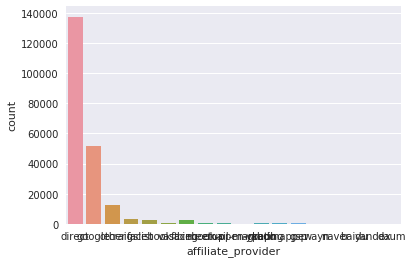

In [66]:
sns.countplot(df_train["affiliate_provider"])

#### 10. date_first_booking

In [81]:
df_train["date_first_booking"].head()

0          NaT
1          NaT
2   2010-08-02
3   2012-09-08
4   2010-02-18
Name: date_first_booking, dtype: datetime64[ns]

In [80]:
df_train["date_first_booking"] = pd.to_datetime(df_train["date_first_booking"], format="%Y-%m-%d", errors='ignore')